In [1]:
import nptdms
from matplotlib import pyplot as plt
from north_diagnostics import Probe
import numpy as np

# Set Up Data File Structure

In [2]:
data, shot_list = {}, [str(shot_no) for shot_no in range(347, 393)]

for shot_no in shot_list:
    data[str(shot_no)] = {}
    data[str(shot_no)]['CTRL'] = {}
    data[str(shot_no)]['DDAQ'] = {}

In [3]:
scan = {'power'    : {}, 
        'B_vert'   : {}, 
        'gas_flow' : {}}

scan['power']['450']    = ['347', '348', '349', '371', '372', '373', '374', '375']
scan['power']['400']    = ['357', '359', '361']
scan['power']['350']    = ['363', '364', '366']
scan['power']['300']    = ['367']

scan['B_vert']['0.0']   = ['376', '377', '378', '379', '380']
scan['B_vert']['0.5']   = ['381', '382', '383']
scan['B_vert']['1.0']   = ['384', '385', '386']
scan['B_vert']['1.5']   = ['387', '388', '389']
scan['B_vert']['2.0']   = ['390', '391', '392']

scan['gas_flow']['5']   = ['347', '348', '349', '371', '372', '373', '374', '375']
scan['gas_flow']['10']  = ['350', '351', '352']
scan['gas_flow']['15']  = ['353', '354', '355']

# Load Control Data

In [4]:
control_data_path = "/mnt/c/Users/alec/Data/NORTH/ProbeSim_2025/Helium/ControlData/"

for shot_no in shot_list:
    print(f"Loading control data for shot {shot_no}...")
    data[shot_no]['CTRL'] = nptdms.TdmsFile.read(f"{control_data_path}/CRIO{shot_no}.tdms")
print("Control data loaded.")

Loading control data for shot 347...
Loading control data for shot 348...
Loading control data for shot 349...
Loading control data for shot 350...
Loading control data for shot 351...
Loading control data for shot 352...
Loading control data for shot 353...
Loading control data for shot 354...
Loading control data for shot 355...
Loading control data for shot 356...
Loading control data for shot 357...
Loading control data for shot 358...
Loading control data for shot 359...
Loading control data for shot 360...
Loading control data for shot 361...
Loading control data for shot 362...
Loading control data for shot 363...
Loading control data for shot 364...
Loading control data for shot 365...
Loading control data for shot 366...
Loading control data for shot 367...
Loading control data for shot 368...
Loading control data for shot 369...
Loading control data for shot 370...
Loading control data for shot 371...
Loading control data for shot 372...
Loading control data for shot 373...
L

# Inspect Control Data

In [5]:
test_shot = '367'

In [6]:
# List the structure of the TDMS file: groups and channels
for group in data[test_shot]['CTRL'].groups():
    print(f"Group: {group.name}")
    for channel in group.channels():
        print(f"  Channel: {channel.name}")

Group: Data
  Channel: Temperature
  Channel: Light
  Channel: Microwave Power
  Channel: Pressure
  Channel: I_TF
  Channel: Reflected Power
  Channel: Time
  Channel: HFS Reflected Power
  Channel: HFS Power
  Channel: Req Power
  Channel: shot
  Channel: Manarm
  Channel: Gas
  Channel: IPF1
  Channel: VPF1
  Channel: HFSset
  Channel: LFSset
  Channel: Geiger
  Channel: HighLevel
  Channel: TotelLevel
  Channel: Serie
  Channel: IBFdump
  Channel: IBFplasma


Group: Data
Could not plot Channel: Temperature


Could not plot Channel: Req Power
Could not plot Channel: shot
Could not plot Channel: Manarm
Could not plot Channel: Serie


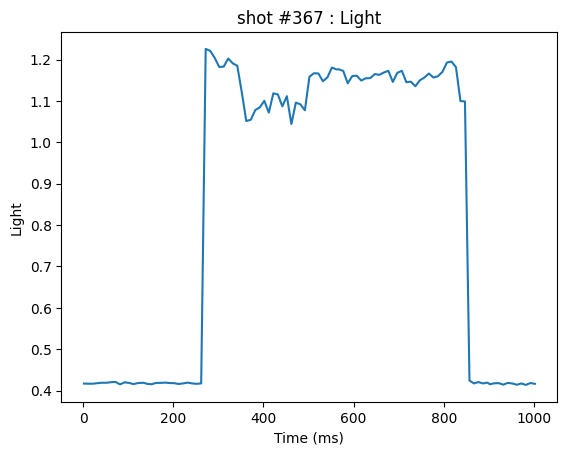

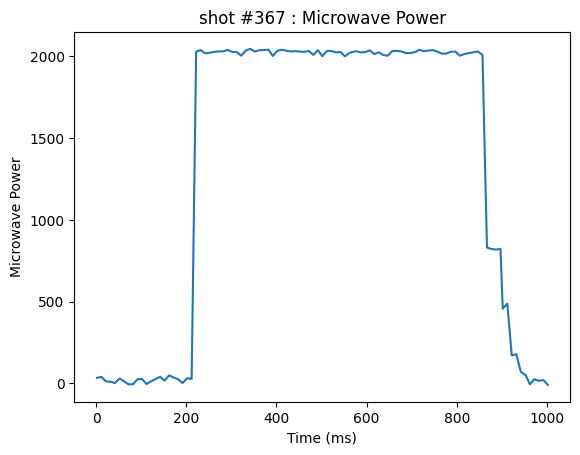

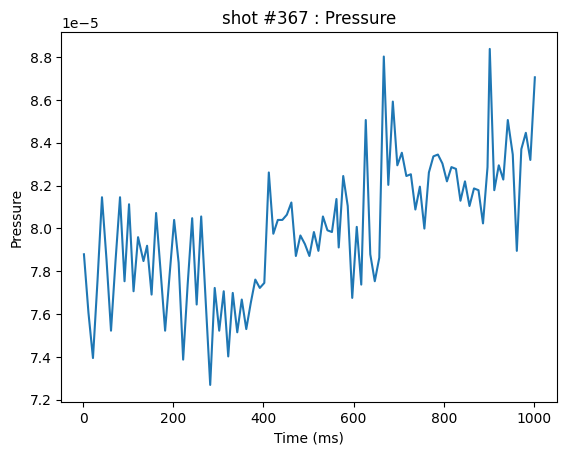

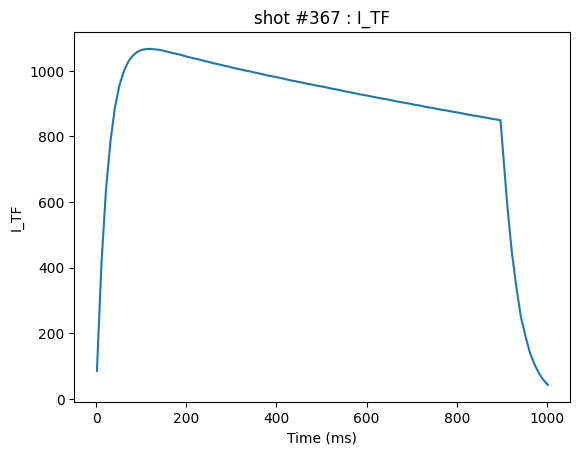

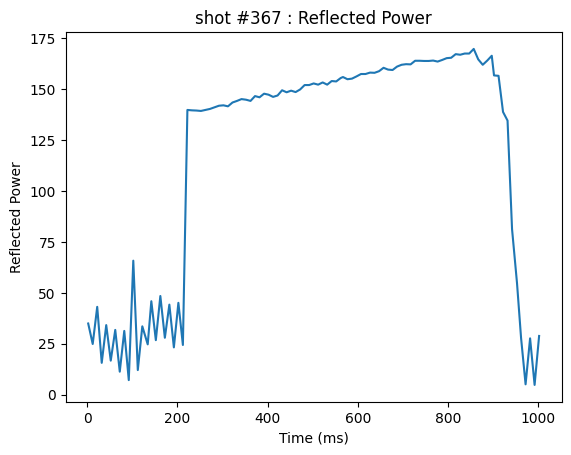

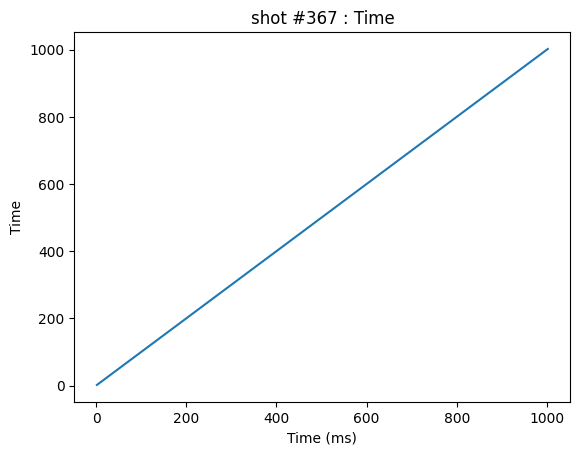

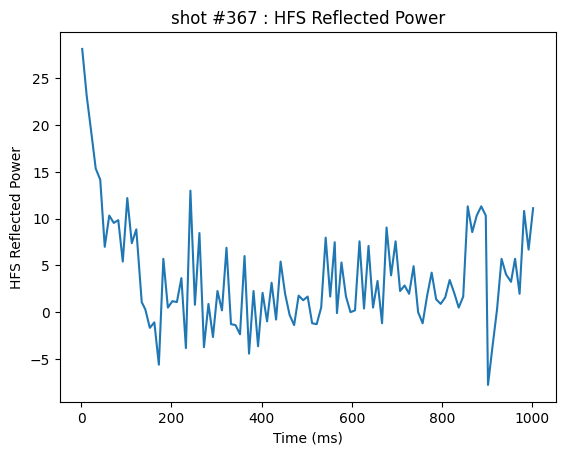

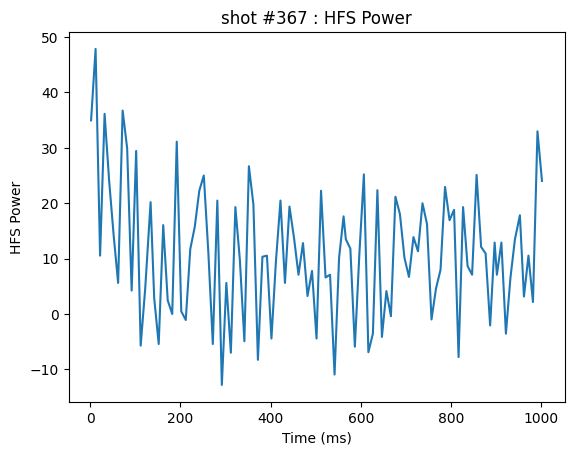

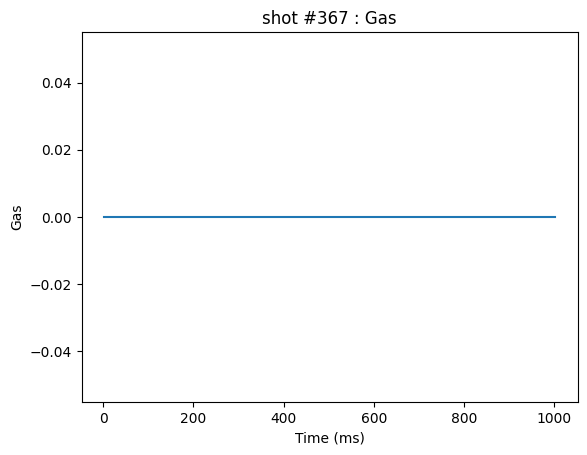

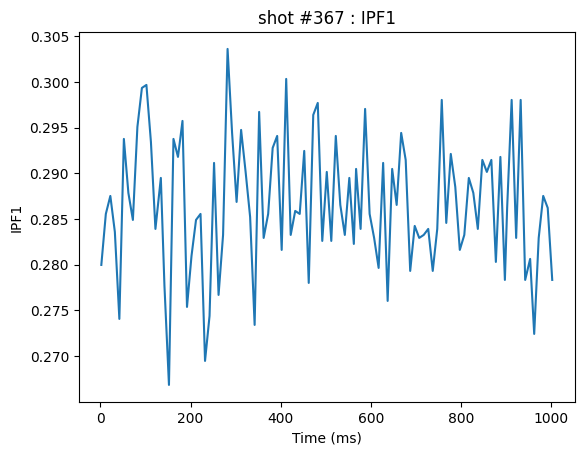

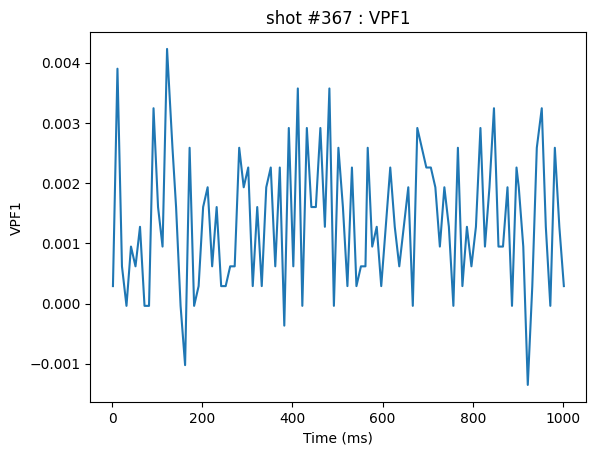

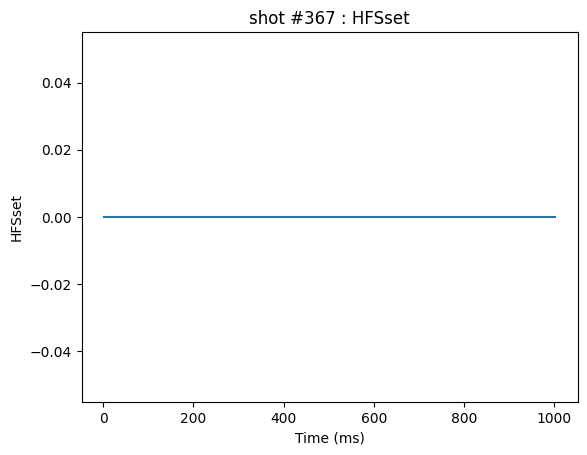

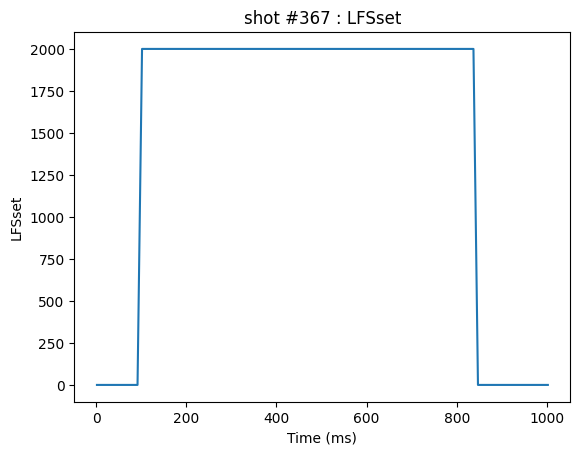

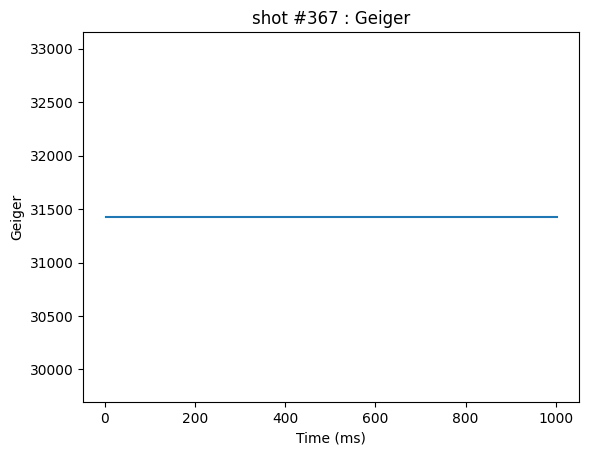

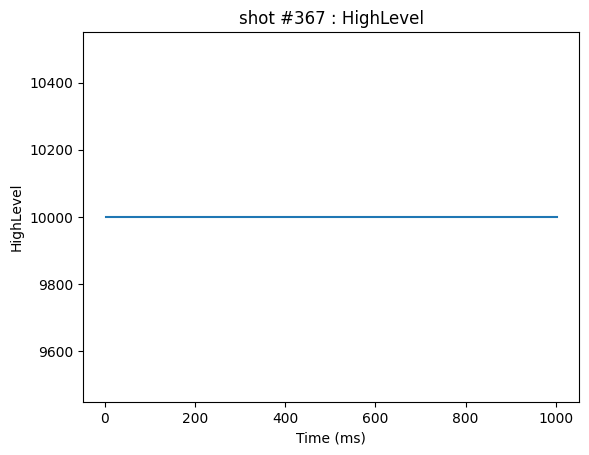

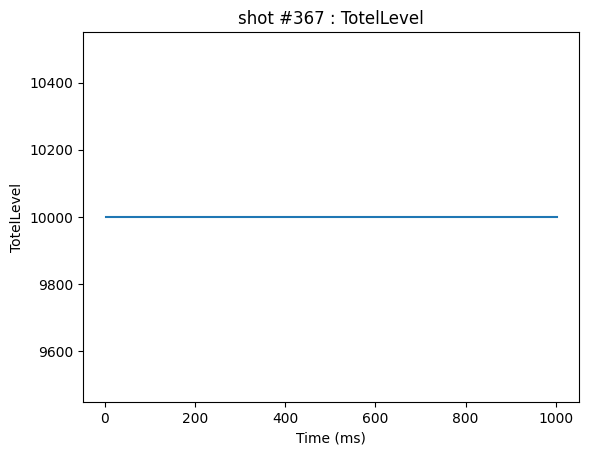

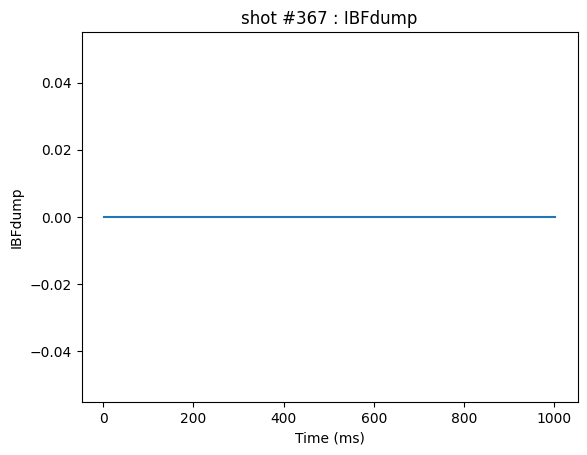

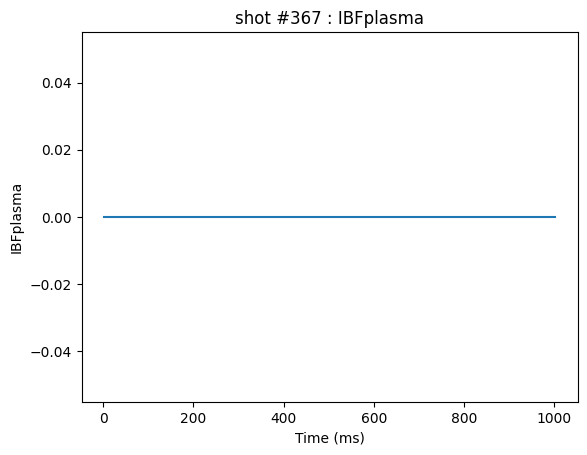

In [7]:
for group in data[test_shot]['CTRL'].groups():
    print(f"Group: {group.name}")
    for channel in group.channels():
        if len(data[test_shot]['CTRL'][group.name][channel.name]) == len(data[test_shot]['CTRL']['Data']['Time']):
            fig, ax = plt.subplots()
            ax.plot(data[test_shot]['CTRL']['Data']['Time'], data[test_shot]['CTRL'][group.name][channel.name])
            ax.set_xlabel("Time (ms)")
            ax.set_ylabel(channel.name)
            ax.set_title(f"shot #{test_shot} : {channel.name}")
        else:
            print(f"Could not plot Channel: {channel.name}")


# Power Scan

In [8]:
scan_key    = 'power'
scan_vals = list(scan[scan_key].keys())

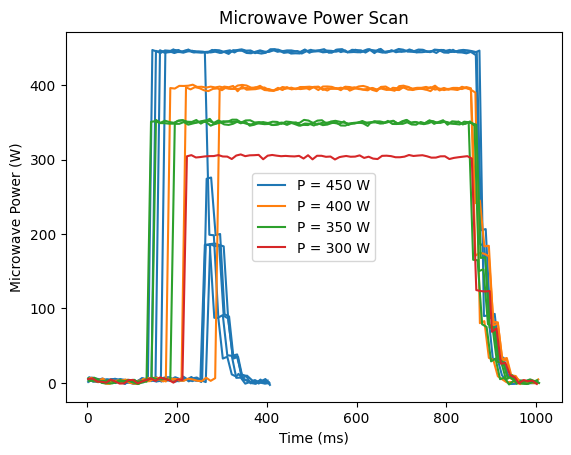

In [9]:
fig, ax = plt.subplots()
for num, val in enumerate(scan_vals):
    for count, shot_no in enumerate(scan[scan_key][val]):
        ax.plot(data[shot_no]['CTRL']['Data']['Time'], data[shot_no]['CTRL']['Data']['Microwave Power'][:]*450/3000, color = f"C{num}", label = f"P = {val} W" if not count else "")
        ax.set_xlabel("Time (ms)")
        ax.set_ylabel("Microwave Power (W)")
        ax.set_title(f"Microwave Power Scan")
        ax.legend()

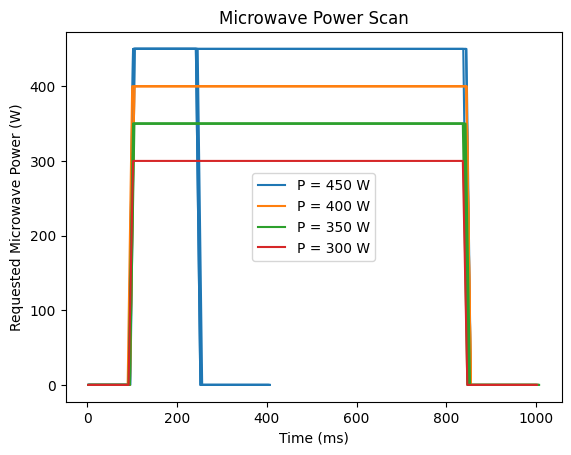

In [10]:
fig, ax = plt.subplots()
for num, val in enumerate(scan_vals):
    for count, shot_no in enumerate(scan[scan_key][val]):
        ax.plot(data[shot_no]['CTRL']['Data']['Time'], data[shot_no]['CTRL']['Data']['LFSset'][:]*450/3000, color = f"C{num}", label = f"P = {val} W" if not count else "")
        ax.set_xlabel("Time (ms)")
        ax.set_ylabel("Requested Microwave Power (W)")
        ax.set_title(f"Microwave Power Scan")
        ax.legend()

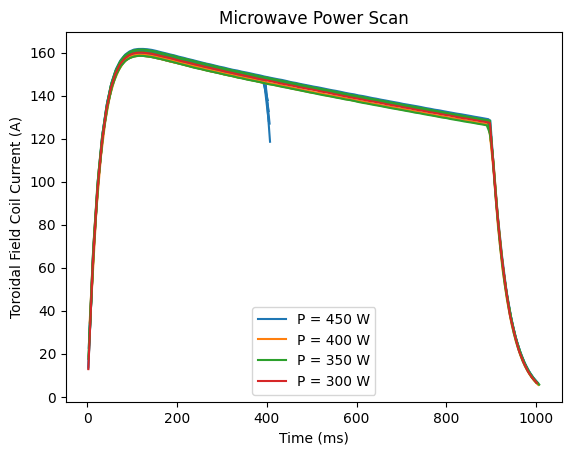

In [11]:
fig, ax = plt.subplots()
for num, val in enumerate(scan_vals):
    for count, shot_no in enumerate(scan[scan_key][val]):
        ax.plot(data[shot_no]['CTRL']['Data']['Time'], data[shot_no]['CTRL']['Data']['I_TF'][:]*450/3000, color = f"C{num}", label = f"P = {val} W" if not count else "")
        ax.set_xlabel("Time (ms)")
        ax.set_ylabel("Toroidal Field Coil Current (A)")
        ax.set_title(f"Microwave Power Scan")
        ax.legend()

# Probe Spectrograms

In [12]:
from north_diagnostics import Probe
import matplotlib.pyplot as plt
import numpy as np

In [17]:
path = "/mnt/c/Users/alec/Data/NORTH/ProbeSim_2025/Helium/DDAQ/"
shot = 367


🔄 Loading configuration for Shot #367 : Probe 10
🔄 Loading data for Shot #367 : Probe 10
🔄 Loading channel for Shot #367 : Probe 10


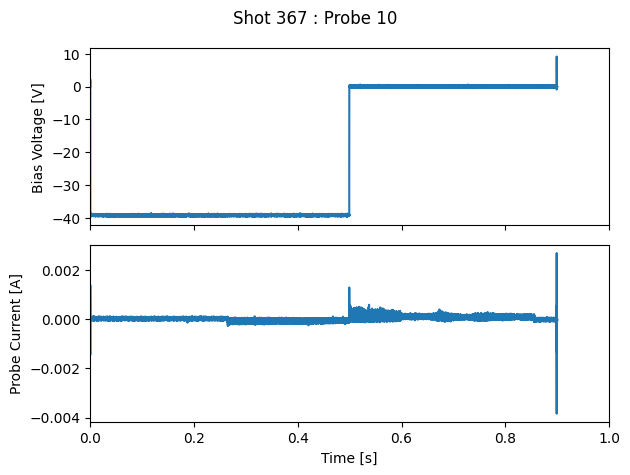

In [18]:
probe = Probe(path = path, shot = shot, number = 10)

# Define the time range for analysis in seconds
t_start, t_end = 0.0, 1.0 # s

# Get the indices corresponding to the specified time range
idx_start, idx_end = probe.get_time_indices(t_start, t_end)

# Create a figure with two subplots sharing the x-axis
fig, ax = plt.subplots(2, sharex=True)

# Plot the bias voltage over the specified time range
ax[0].plot(probe.time[idx_start:idx_end], probe.bias_voltage[idx_start:idx_end])

# Plot the probe current over the specified time range
ax[1].plot(probe.time[idx_start:idx_end], probe.current[idx_start:idx_end])

# Set the x-axis limits to the specified time range
ax[1].set_xlim(t_start, t_end)

# Label the y-axes for each subplot
ax[0].set_ylabel("Bias Voltage [V]")
ax[1].set_ylabel("Probe Current [A]")

# Label the x-axis for the second subplot
ax[1].set_xlabel("Time [s]")

# Add a title to the figure indicating the shot and probe number
fig.suptitle(f"Shot {probe.shot} : Probe {probe.number}")
fig.tight_layout()

In [19]:
probes = [Probe(path, shot, number, caching=True) for number in range(50)]

🔄 Loading position data for Shot #367
🔄 Loading mapping data for Shot #367
🔄 Bulk loading probe data for Shot #367


/tmp/ipykernel_1150050/4095992014.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(2)


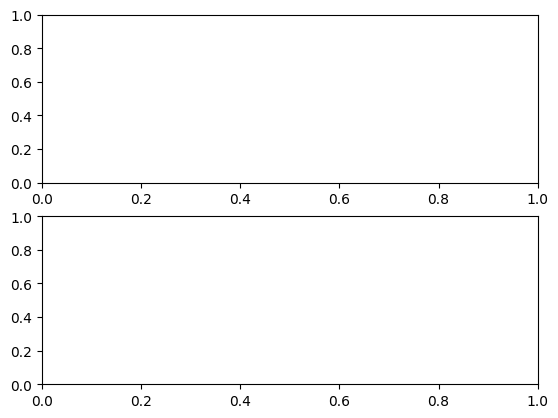

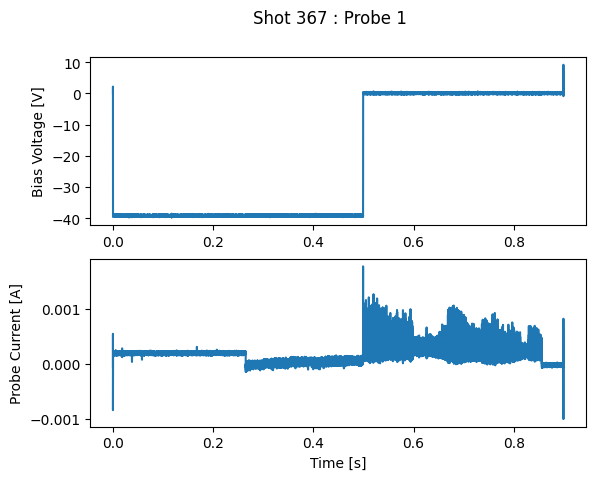

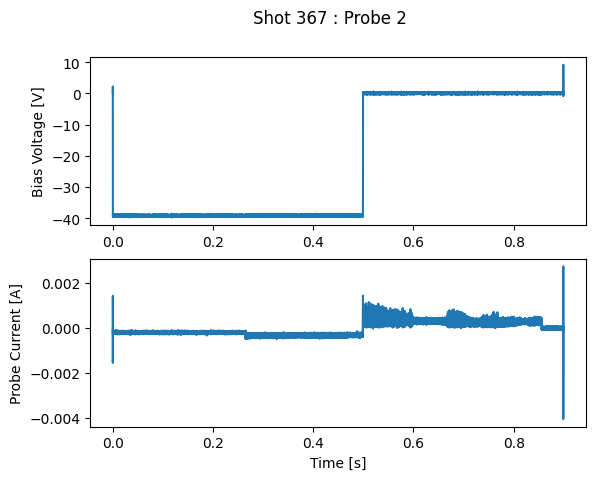

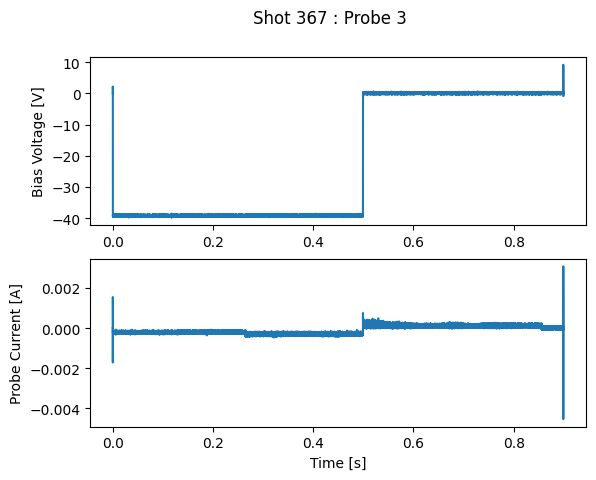

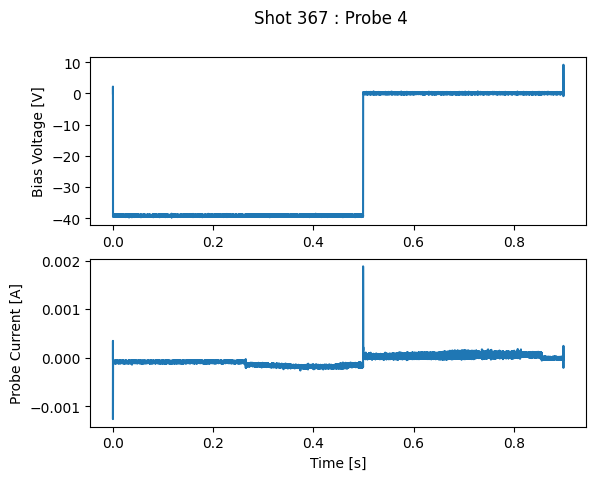

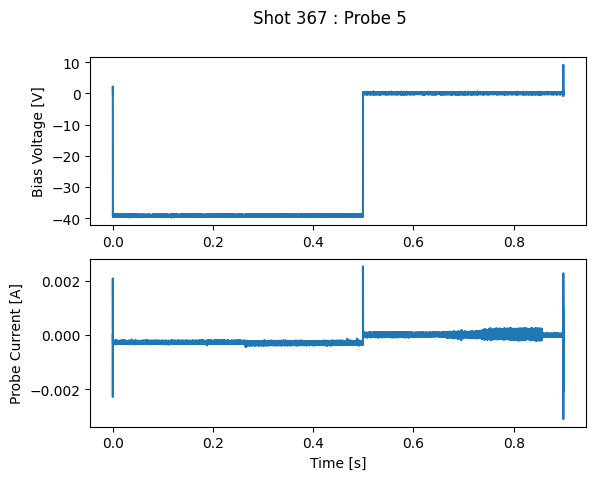

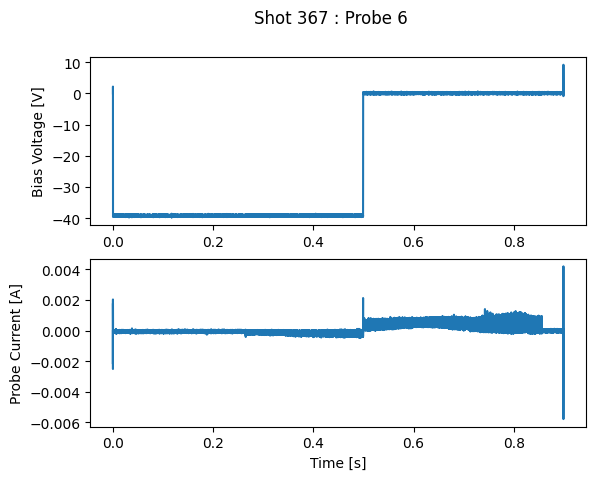

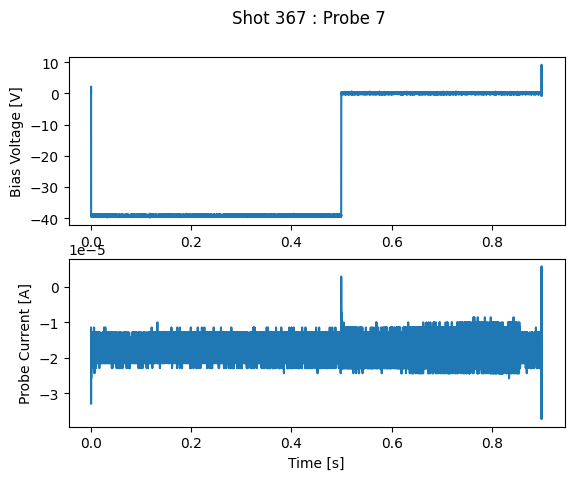

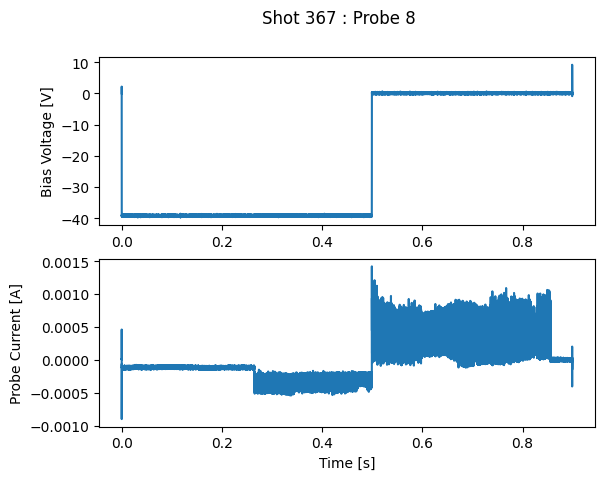

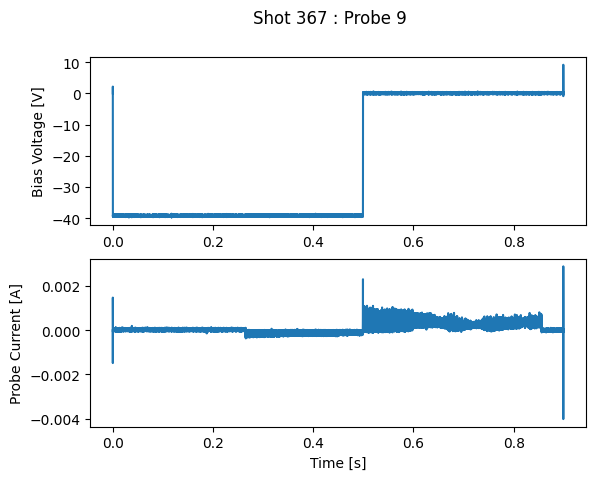

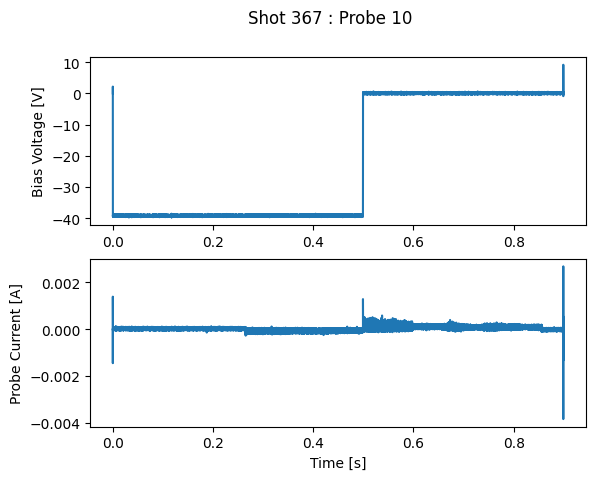

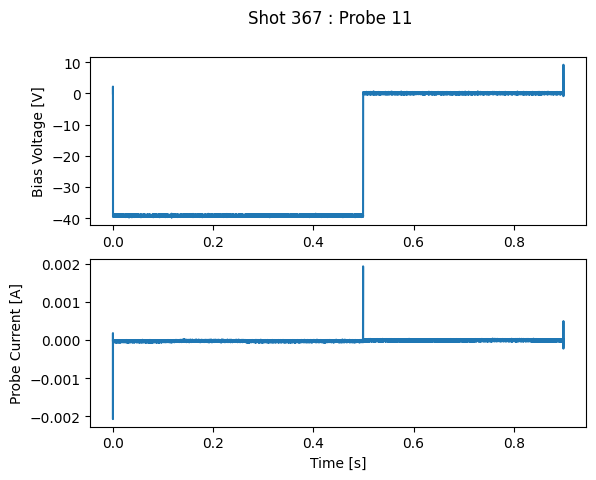

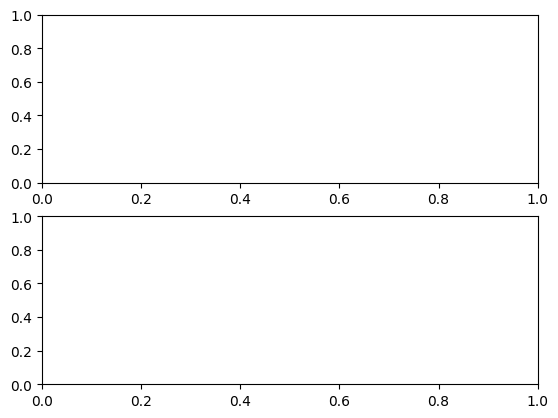

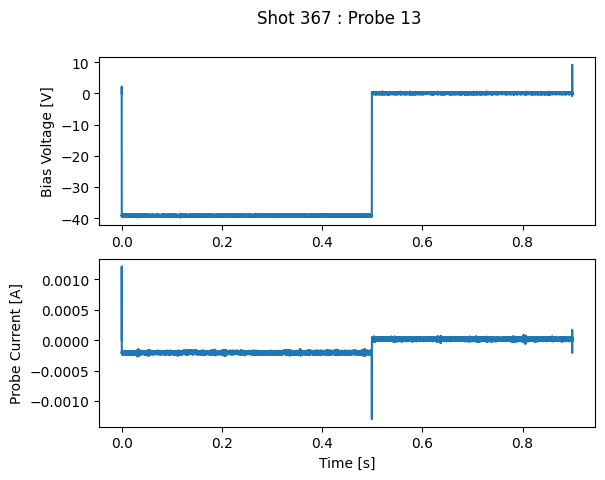

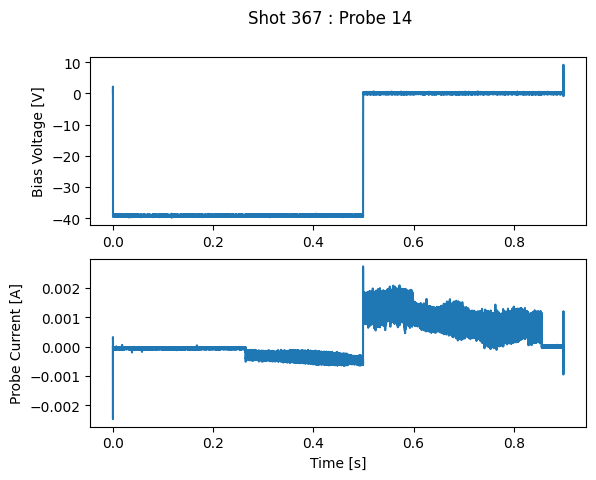

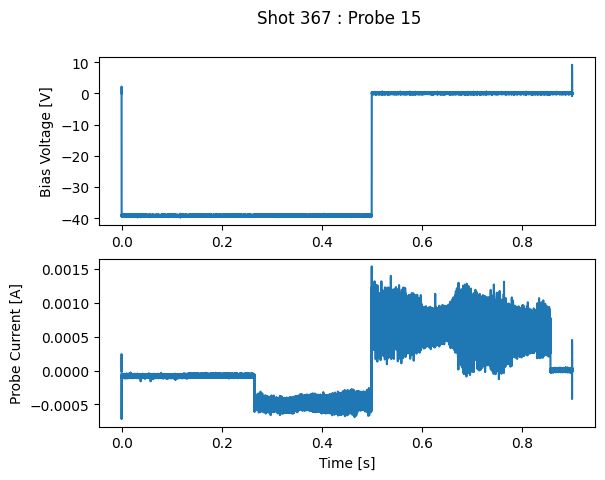

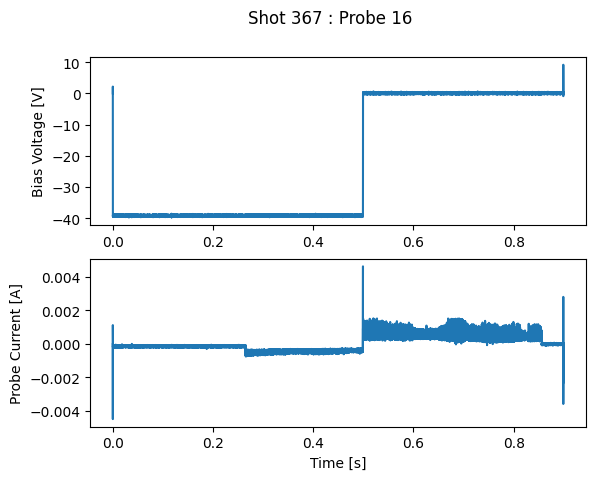

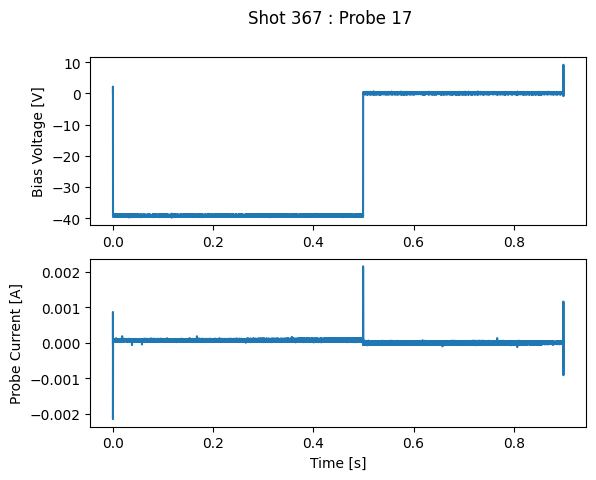

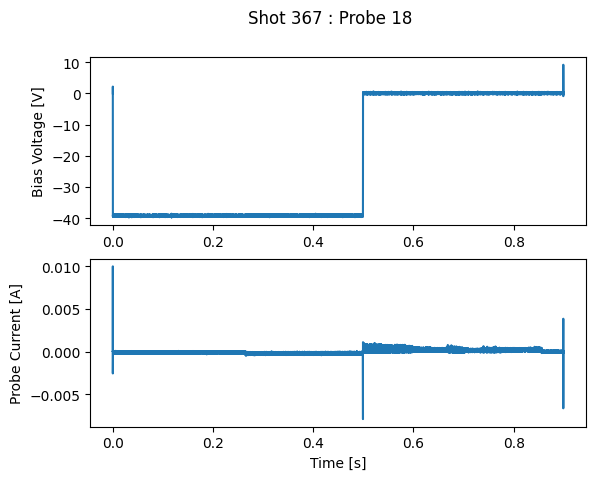

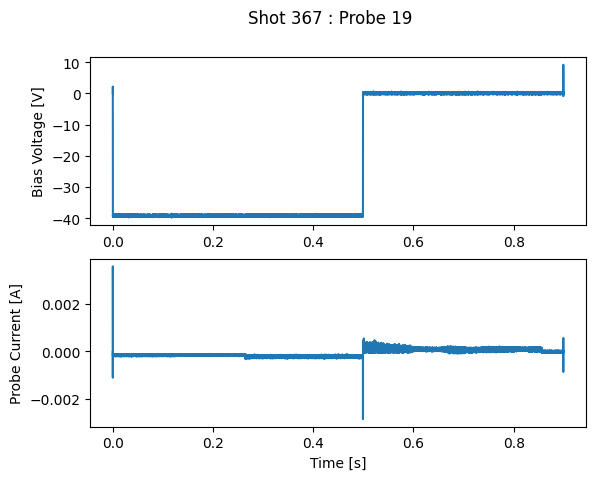

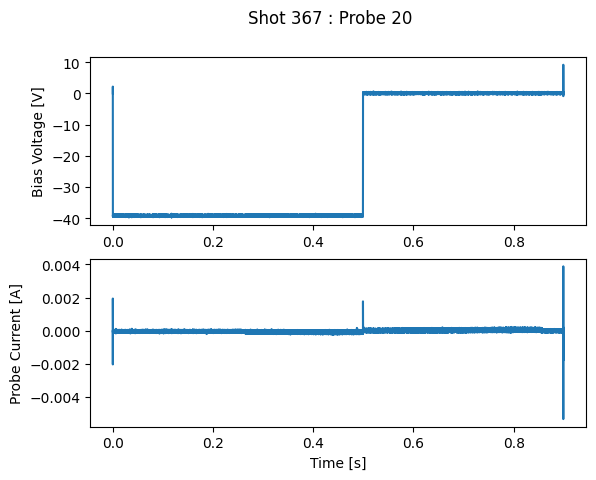

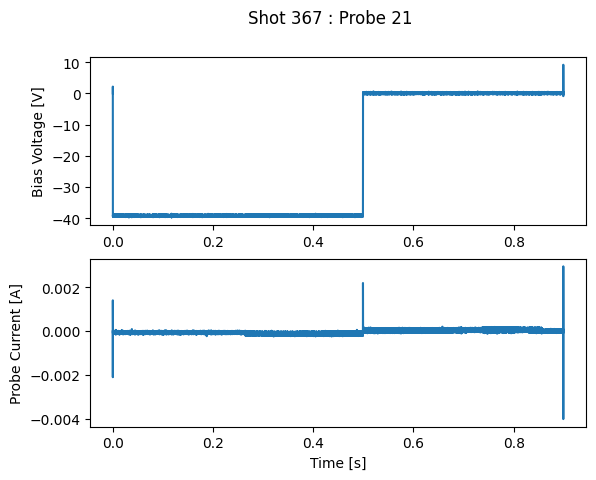

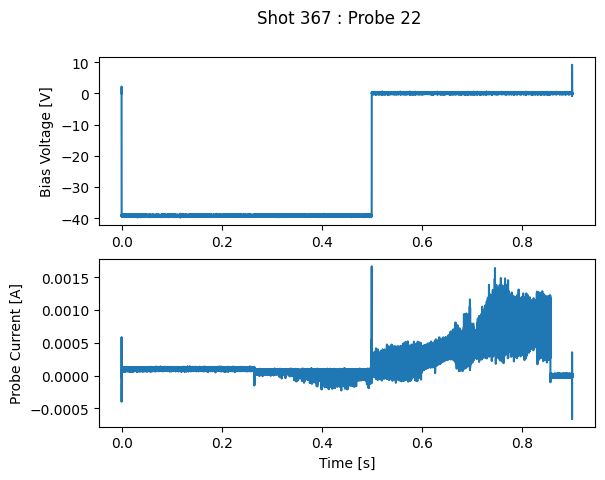

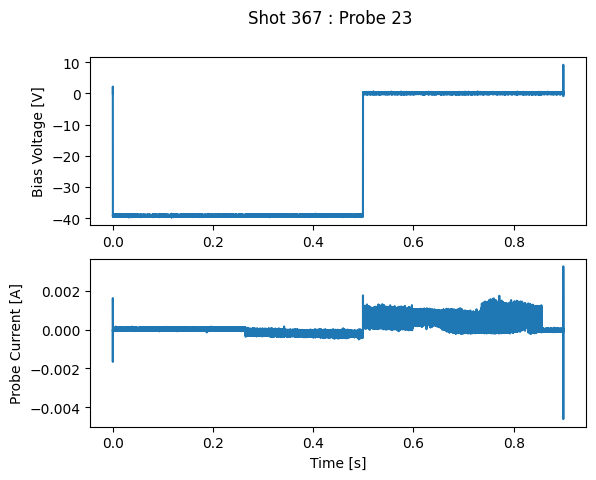

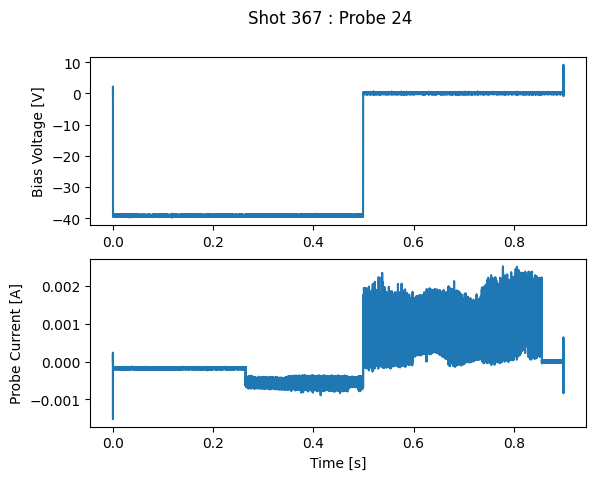

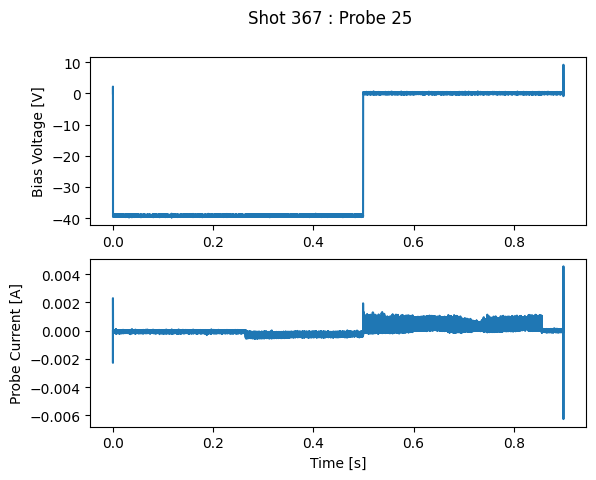

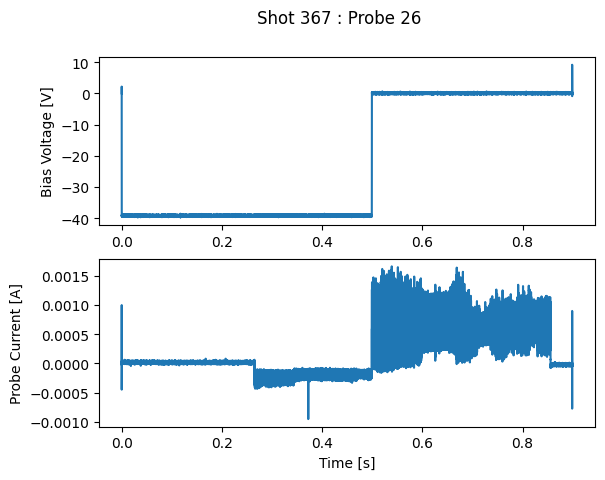

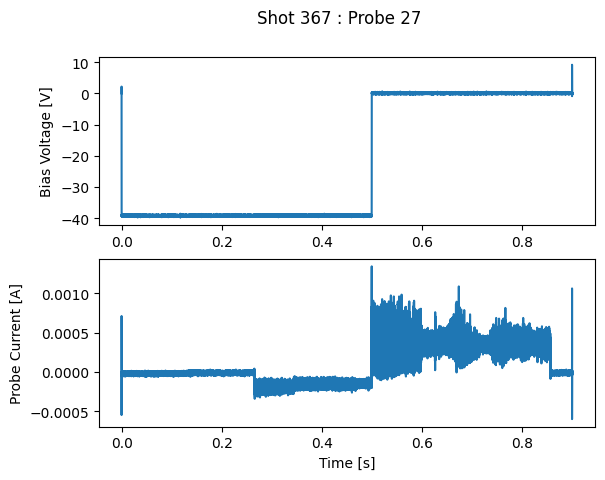

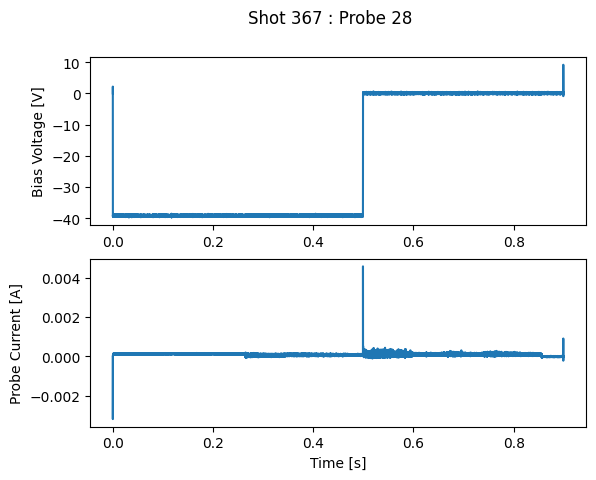

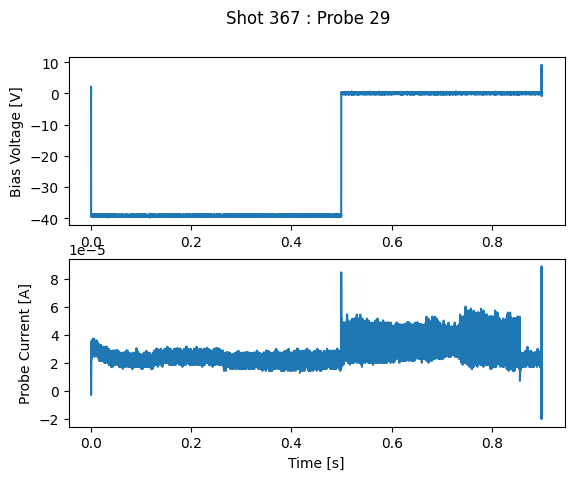

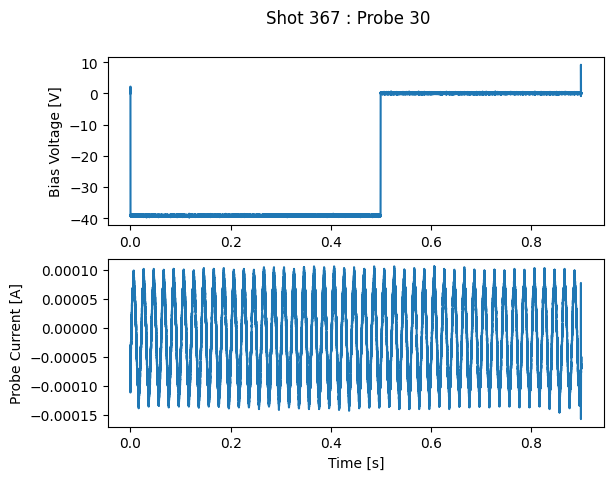

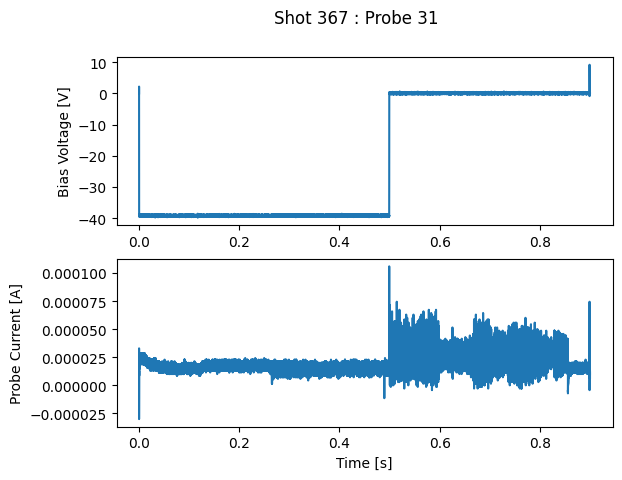

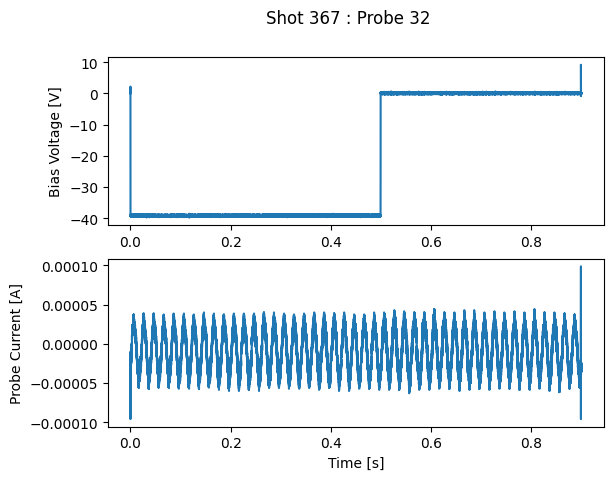

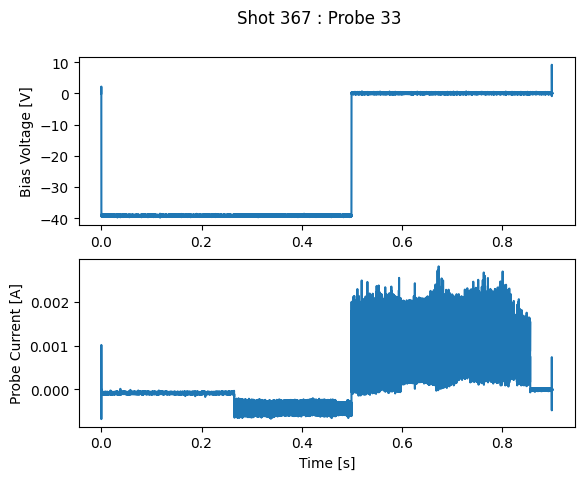

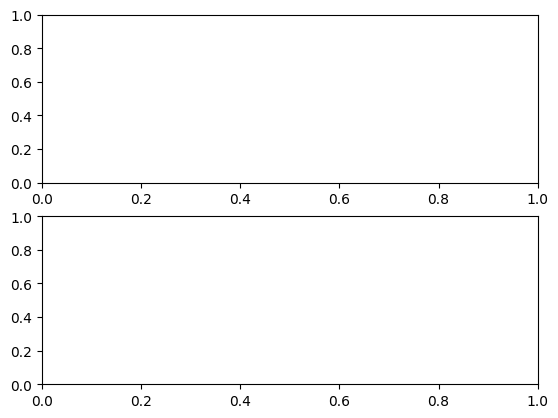

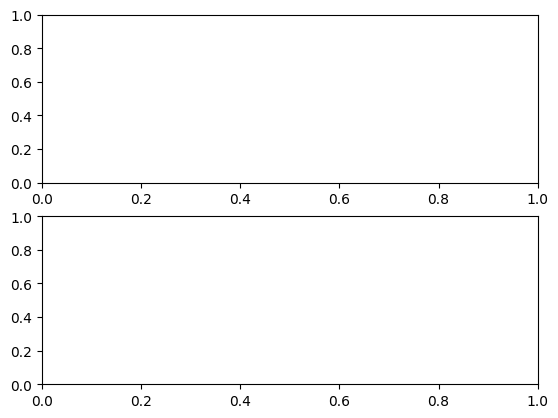

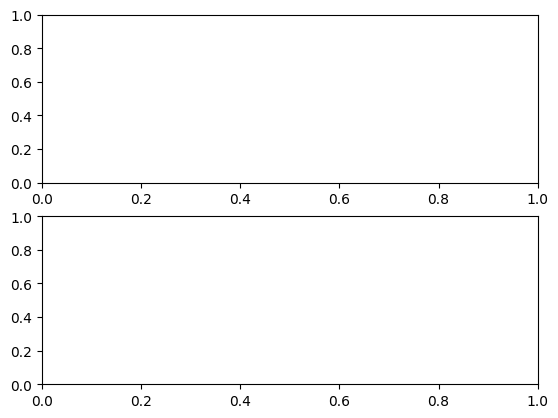

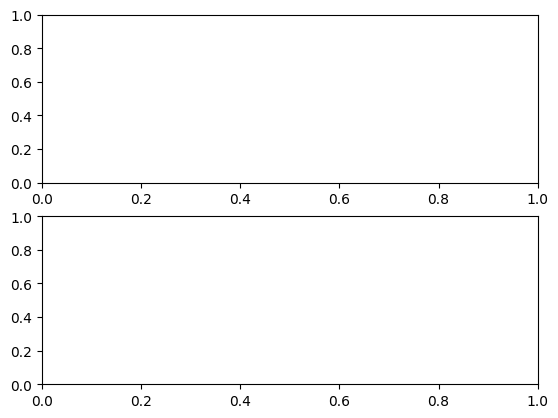

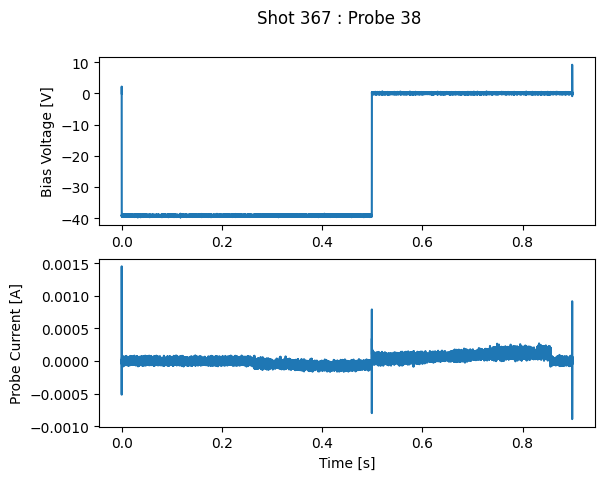

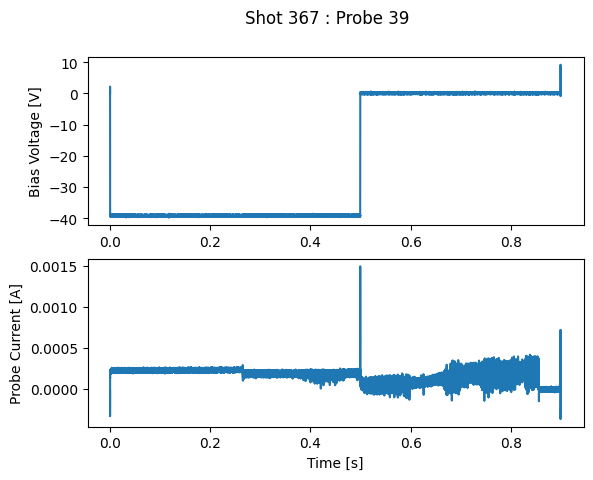

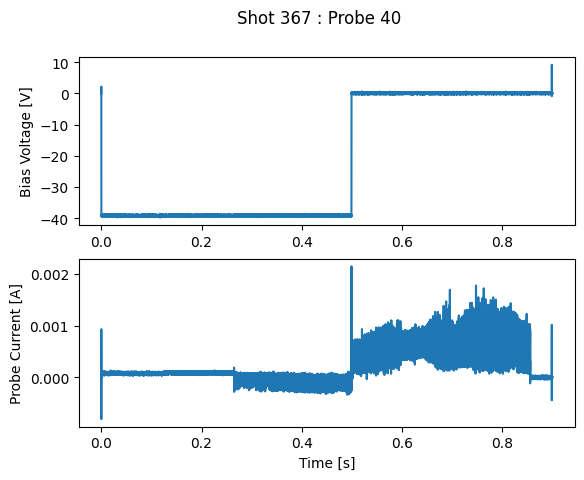

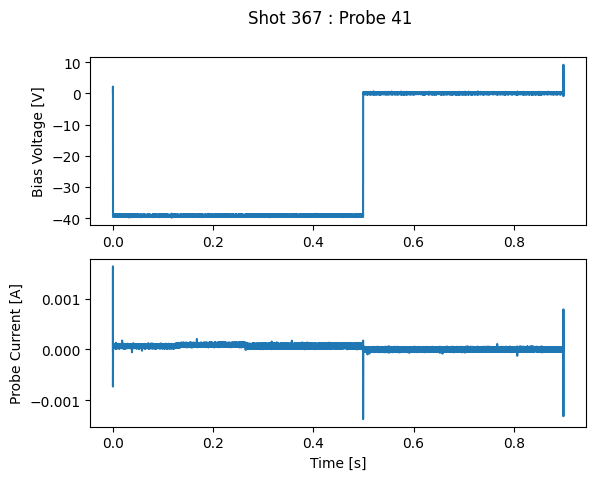

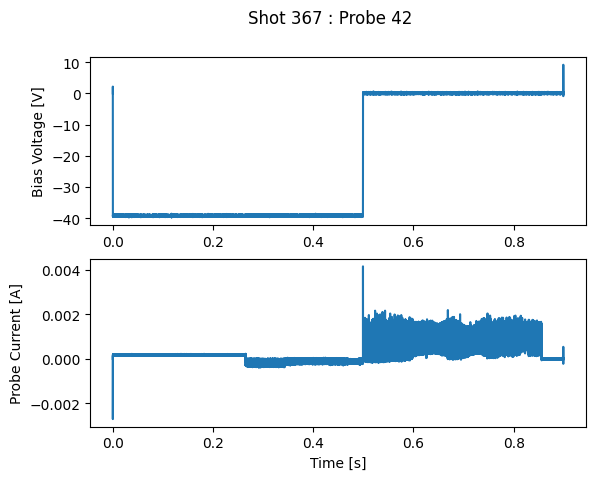

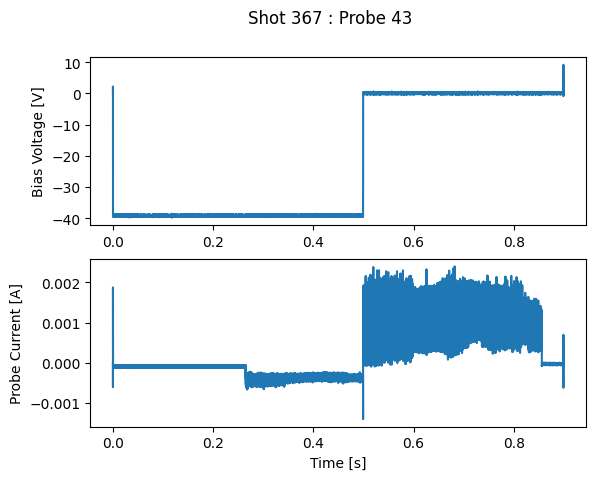

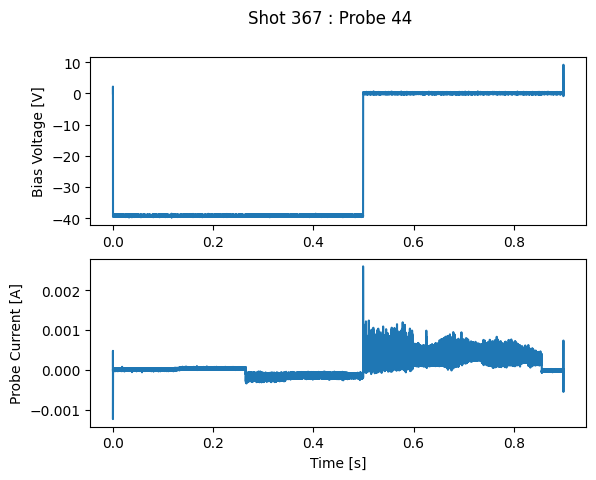

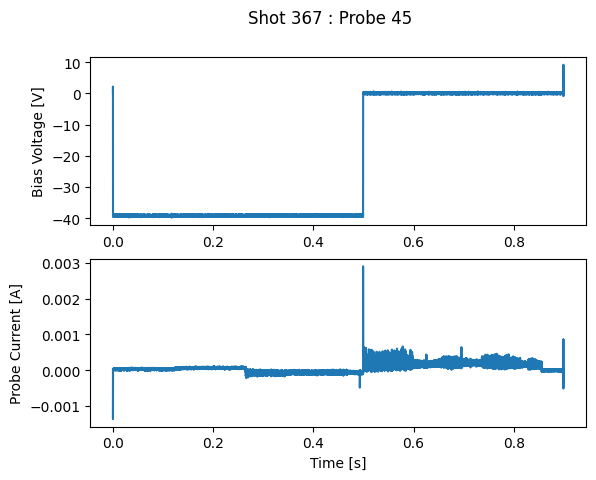

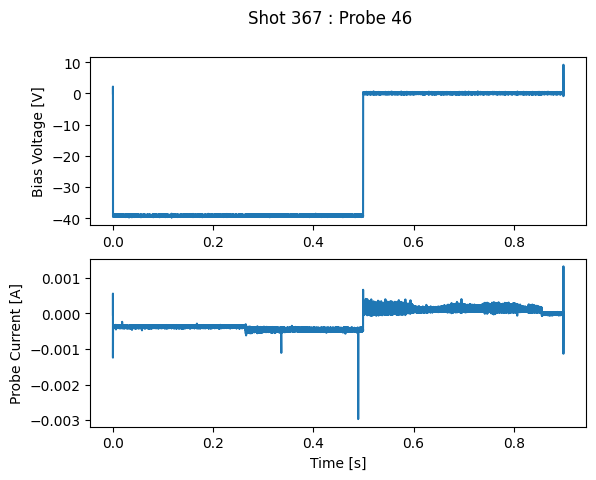

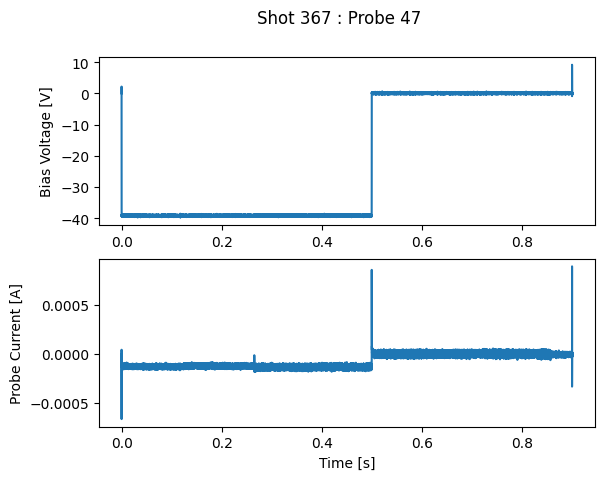

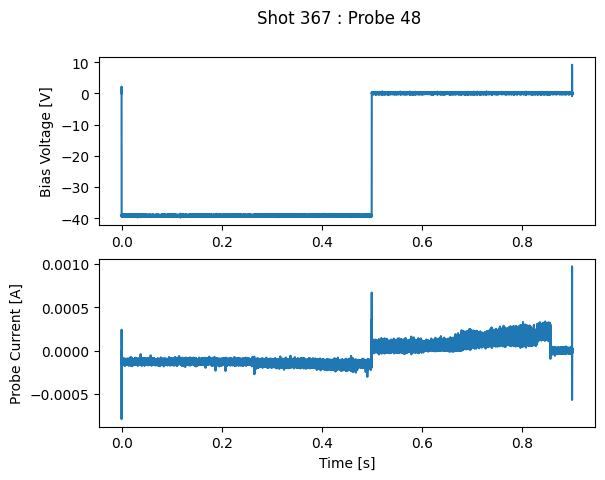

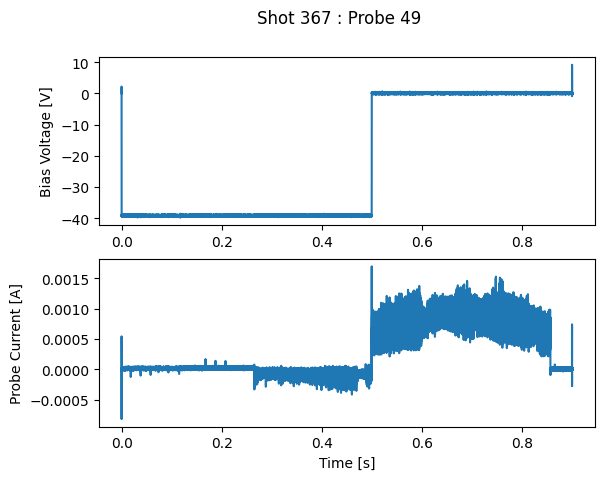

In [23]:
for p in probes:
    try:
        fig, ax = plt.subplots(2)
        ax[0].plot(p.time, p.bias_voltage)
        ax[1].plot(p.time, p.current)
        ax[0].set_ylabel("Bias Voltage [V]")
        ax[1].set_ylabel("Probe Current [A]")
        ax[1].set_xlabel("Time [s]")
        fig.suptitle(f"Shot {p.shot} : Probe {p.number}")
    except:
        continue